In [1]:
import numpy as np
import matplotlib.pyplot as plt

from abc import ABC, abstractmethod

### Preparing the data set

There will be several data sets we therefore define abstract interface an implement concrete classes that derive the interface below.

In [2]:
class Dataset(ABC):
        
    @abstractmethod
    def get_train_x(self):
        """ Retrieve the input data of the training """
        pass
    
    @abstractmethod
    def get_train_y(self):
        """ Retrieve the output data of the training """
        pass
    
    @abstractmethod
    def get_test_x(self):
        """ Retrieve the input data of the test """
        pass
    
    @abstractmethod
    def get_test_y(self):
        """ Retrieve the output data of the test """
        pass

In [3]:
class CreditDataset(Dataset):
    def __init__(self):
        self.data = np.loadtxt("../data/german_credit.csv", delimiter=",", skiprows=1)
        self.y = self.data[:, 15] # get the labels from the last column
        self.x = self.data[:, 0:15] # get the features from the first 15 columns

        #normalize data
        data_min = np.min(self.x, axis=0)
        data_max = np.max(self.x, axis=0)
        x_norm = (self.x - data_min) / (data_max - data_min)

        #one-hot encoding
        self.y_encoded = np.zeros((self.y.shape[0], 3))
        for i, label in enumerate(self.y):
            if label == 1:
                self.y_encoded[i, 0] = 1
            elif label == 2:
                self.y_encoded[i, 1] = 1
            elif label == 3:
                self.y_encoded[i, 2] = 1

        #np where -> 3 classen -> shuffle -> 33 test -> rest
        label1_idx = np.where(self.y == 1)[0]
        label2_idx = np.where(self.y == 2)[0]
        label3_idx = np.where(self.y == 3)[0]
        np.random.shuffle(label1_idx)
        np.random.shuffle(label2_idx)
        np.random.shuffle(label3_idx)
        test_l1_idx = label1_idx[:33]
        test_l2_idx = label2_idx[:33]
        test_l3_idx = label3_idx[:33]
        train_l1_idx = label1_idx[33:]
        train_l2_idx = label2_idx[33:]
        train_l3_idx = label3_idx[33:]

        self.train_x = np.vstack((x_norm[train_l1_idx], x_norm[train_l2_idx], x_norm[train_l3_idx]))
        self.train_y = np.vstack((self.y_encoded[train_l1_idx], self.y_encoded[train_l2_idx], self.y_encoded[train_l3_idx]))
        self.test_x = np.vstack((x_norm[test_l1_idx], x_norm[test_l2_idx], x_norm[test_l3_idx]))
        self.test_y = np.vstack((self.y_encoded[test_l1_idx], self.y_encoded[test_l2_idx], self.y_encoded[test_l3_idx]))

    def get_train_x(self):
        return self.train_x

    def get_train_y(self):
        return self.train_y

    def get_test_x(self):
        return self.test_x

    def get_test_y(self):
        return self.test_y

In [4]:
class CreditDatasetOversampled(Dataset):
    def __init__(self):
        self.data = np.loadtxt("../data/german_credit.csv", delimiter=",", skiprows=1)
        self.y = self.data[:, 15] # get the labels from the last column
        self.x = self.data[:, 0:15] # get the features from the first 15 columns

        #normalize data
        data_min = np.min(self.x, axis=0)
        data_max = np.max(self.x, axis=0)
        x_norm = (self.x - data_min) / (data_max - data_min)

        #one-hot encoding
        self.y_encoded = np.zeros((self.y.shape[0], 3))
        for i, label in enumerate(self.y):
            if label == 1:
                self.y_encoded[i, 0] = 1
            elif label == 2:
                self.y_encoded[i, 1] = 1
            elif label == 3:
                self.y_encoded[i, 2] = 1

        #np where -> 3 classen -> shuffle -> 33 test -> rest
        label1_idx = np.where(self.y == 1)[0]
        label2_idx = np.where(self.y == 2)[0]
        label3_idx = np.where(self.y == 3)[0]
        np.random.shuffle(label1_idx)
        np.random.shuffle(label2_idx)
        np.random.shuffle(label3_idx)
        test_l1_idx = label1_idx[:33]
        test_l2_idx = label2_idx[:33]
        test_l3_idx = label3_idx[:33]
        train_l1_idx = label1_idx[33:]
        train_l2_idx = label2_idx[33:]
        train_l3_idx = label3_idx[33:]

        #oversampling
        arrays = [train_l1_idx,train_l2_idx, train_l3_idx]
        # max size
        max_size = max(np.shape(array) for array in arrays)
        oversampled_train_data = [np.random.choice(arr, size=max_size, replace=True)
                                  if np.shape(arr) < max_size
                                  else arr
                                  for arr in arrays]

        train_l1_idx = oversampled_train_data[0]
        train_l2_idx = oversampled_train_data[1]
        train_l3_idx = oversampled_train_data[2]

        self.train_x = np.vstack((x_norm[train_l1_idx], x_norm[train_l2_idx], x_norm[train_l3_idx]))
        self.train_y = np.vstack((self.y_encoded[train_l1_idx], self.y_encoded[train_l2_idx], self.y_encoded[train_l3_idx]))
        self.test_x = np.vstack((x_norm[test_l1_idx], x_norm[test_l2_idx], x_norm[test_l3_idx]))
        self.test_y = np.vstack((self.y_encoded[test_l1_idx], self.y_encoded[test_l2_idx], self.y_encoded[test_l3_idx]))

    def get_train_x(self):
        return self.train_x

    def get_train_y(self):
        return self.train_y

    def get_test_x(self):
        return self.test_x

    def get_test_y(self):
        return self.test_y

In [5]:
class CreditDatasetUndersampled(Dataset):
    def __init__(self):
        self.data = np.loadtxt("../data/german_credit.csv", delimiter=",", skiprows=1)
        self.y = self.data[:, 15] # get the labels from the last column
        self.x = self.data[:, 0:15] # get the features from the first 15 columns

        #normalize data
        data_min = np.min(self.x, axis=0)
        data_max = np.max(self.x, axis=0)
        x_norm = (self.x - data_min) / (data_max - data_min)

        #one-hot encoding
        self.y_encoded = np.zeros((self.y.shape[0], 3))
        for i, label in enumerate(self.y):
            if label == 1:
                self.y_encoded[i, 0] = 1
            elif label == 2:
                self.y_encoded[i, 1] = 1
            elif label == 3:
                self.y_encoded[i, 2] = 1

        #np where -> 3 classen -> shuffle -> 33 test -> rest
        label1_idx = np.where(self.y == 1)[0]
        label2_idx = np.where(self.y == 2)[0]
        label3_idx = np.where(self.y == 3)[0]
        np.random.shuffle(label1_idx)
        np.random.shuffle(label2_idx)
        np.random.shuffle(label3_idx)
        test_l1_idx = label1_idx[:33]
        test_l2_idx = label2_idx[:33]
        test_l3_idx = label3_idx[:33]
        train_l1_idx = label1_idx[33:]
        train_l2_idx = label2_idx[33:]
        train_l3_idx = label3_idx[33:]

        #undersampling
        arrays = [train_l1_idx, train_l2_idx, train_l3_idx]
        # min size
        min_size = min(np.shape(array) for array in arrays)
        undersampled_train_data = [np.random.choice(arr, size=min_size, replace=False) for arr in arrays]

        train_l1_idx = undersampled_train_data[0]
        train_l2_idx = undersampled_train_data[1]
        train_l3_idx = undersampled_train_data[2]

        self.train_x = np.vstack((x_norm[train_l1_idx], x_norm[train_l2_idx], x_norm[train_l3_idx]))
        self.train_y = np.vstack((self.y_encoded[train_l1_idx], self.y_encoded[train_l2_idx], self.y_encoded[train_l3_idx]))
        self.test_x = np.vstack((x_norm[test_l1_idx], x_norm[test_l2_idx], x_norm[test_l3_idx]))
        self.test_y = np.vstack((self.y_encoded[test_l1_idx], self.y_encoded[test_l2_idx], self.y_encoded[test_l3_idx]))

    def get_train_x(self):
        return self.train_x

    def get_train_y(self):
        return self.train_y

    def get_test_x(self):
        return self.test_x

    def get_test_y(self):
        return self.test_y

### Operations of a neural network

Every neural network consists of serveral operations which gets executed during a forward and backward pass

In [6]:
class Operation(ABC):
        
    @abstractmethod
    def forward(self, data):
        """ Forward pass of the operation. Process the input data.
        
        Parameters
        ----------
        data : ndarray
            Data from the last layer
        
        Returns
        -------
        result : ndarray
            The result of processing the input data
        """
        pass
    
    @abstractmethod
    def backward(self, gradient_data):
        """ Backward pass of the operation. The gradient data is uses 
        to compute the changes of weights and the partial gradient of 
        the this layer.
        
        Parameters
        ----------
        gradient_data : ndarray
            Gradient data from the previous layer during the backward pass
        
        Returns
        -------
        result : ndarray
            The partial gradient of the this layer with respect to the incoming gradient_data
        """
        pass

### TODO implement the different operations of a network

In [7]:
class BiasOperation(Operation):
    """ Bias operation in the network """
    
    def forward(self, data):
        #print("bias data shape:", data.shape)
        return np.hstack(( data ,np.ones((data.shape[0], 1))))
    
    def backward(self, gradient_data):
        return gradient_data[:,1:]

In [8]:
class SigmoidOperation(Operation):
    """ Sigmoid function in the network """
    _z = None

    def forward(self, data):
        self._z = 1 / (1 + np.exp(-data))
        return self._z
    
    def backward(self, gradient_data):
        return gradient_data * self._z * (1 - self._z)

In [9]:
class LossOperation(Operation):
    """ Loss function in the network """    
    _y = None
    
    def set_y(self, y):
        """ Store the correct y value for later comparison """
        self._y = y
    
    def forward(self, data):
        #print("loss data shape:", data.shape)
        return 0.5 * (data - self._y) ** 2
    
    def backward(self, gradient_data):
        return (gradient_data - self._y)

In [10]:
class InnerProductOperation(Operation):
    """ Inner Product, Fully Connected or Dense operation in the network """
    _learn_rate = 0.1
    _weights = None
    _input_data = None
    
    def __init__(self, input_units, hidden_units):
        self._weights = np.random.uniform(low = -1, high = 1, size = (input_units, hidden_units))
    
    def set_learn_rate(self, learn_rate):
        """ Change the learn rate """
        self._learn_rate = learn_rate
    
    def forward(self, data):
        #print("data shape:", data.shape)
        #print("weights shape:", self._weights.shape)
        self._input_data = data
        return np.matmul(data, self._weights)
    
    def backward(self, gradient_data):
        gradient = np.matmul(self._input_data.T, gradient_data)
        #ableitung input
        inp = np.matmul(gradient_data, self._weights.T)

        self._weights = self._weights - (self._learn_rate / self._input_data.shape[0] * gradient)

        return inp

### Setup the neural network 

Using the operations we can now build our own neural network

In [11]:
class Network(ABC):
    
    _ops = []
    _train_errors = []
    _test_accuracies = []
    
    def get_test_accuracies(self):
        return self._test_accuracies
    
    def get_train_errors(self):
        return self._train_errors
    
    def predict(self,data):
        return self.forwardPass(data, len(self._ops)-1)
    
    def forwardPass(self,data, layers):
        result = data
        for op in range(0,layers):     
            result = self._ops[op].forward(result)
            #print("result shape:", result.shape)
        return (result)
        
    def backwardPass(self, data, layers):
        result = data
        for op in range(len(self._ops)-1, len(self._ops) - layers , -1):
            result = self._ops[op].backward(result)
        return result
    
    @abstractmethod
    def train(self, dataset, epochs, learn_rate, error_output_every):
        """ Train the neural network with the data set several epochs.
        Compute the train error and test accurarcy after some iterations.
        
        Parameters
        ----------
        dataset : ndarray
            Data from the last layer
        epochs : int
            Number of epochs to be trained
        learn_rate : float
            Learn rated to be used to changing the weights of the network
        error_output_every : int
            After how many iterations should the train error and test accurarcy be calculated
        """
        pass

### TODO implement mini btaches into CreditNetwork training


In [12]:
class CreditNetwork(Network):
    def __init__(self, input_units, output_units, hidden_units):
        self._ops = []
        self._ops.append(BiasOperation())
        self._ops.append(InnerProductOperation(input_units + 1, hidden_units))
        self._ops.append(SigmoidOperation())
        self._ops.append(BiasOperation())
        self._ops.append(InnerProductOperation(hidden_units + 1, output_units))
        self._ops.append(SigmoidOperation())
        self._ops.append(LossOperation())
        print('Setup Credit Network')

    def train(self, dataset, epochs, learn_rate, error_output_every):
        print('Start training of the Credit network ...')

        # Clear old train errors and test accuracies
        self._train_errors = []
        self._test_accuracies = []

        # Fix learn rate for all layers
        for op in self._ops:
            if type(op) == InnerProductOperation:
                op.set_learn_rate(learn_rate)

        # Get the last layer (loss layer)
        last_layer = self._ops[len(self._ops) - 1]

        # Get the train and test data
        train_x = dataset.get_train_x()
        train_y = dataset.get_train_y()
        test_x = dataset.get_test_x()
        test_y = dataset.get_test_y()

        # Train the network
        for e in range(0, epochs + 1):
            # Forward propagation
            hypothese = self.predict(train_x)

            # Place the target data in the loss layer
            last_layer.set_y(train_y)

            # Backward propagate and change the weights
            self.backwardPass(hypothese, len(self._ops))

            # Print the train error and test accuracy after a certain number of epochs
            if e % error_output_every == 0:
                # Compute train error with the train data
                error = last_layer.forward(hypothese).sum() / train_x.shape[0]
                self._train_errors.append(error)

                # Compute test accuracy with the test data
                predictions = self.predict(test_x)

                predicted_labels = np.argmax(predictions, axis=1)
                test_labels = np.argmax(test_y, axis=1)

                total_matches = (predicted_labels == test_labels).sum()

                accuracy = total_matches / test_x.shape[0]
                self._test_accuracies.append(accuracy * 100)
                print('Epoch', e, 'with error:', error, 'and accuracy:', accuracy)

In [13]:
class CreditNetwork_miniBatches(Network):
    def __init__(self, input_units, output_units, hidden_units, batch_size):
        self._ops = []
        self._ops.append(BiasOperation())
        self._ops.append(InnerProductOperation(input_units + 1, hidden_units))
        self._ops.append(SigmoidOperation())
        self._ops.append(BiasOperation())
        self._ops.append(InnerProductOperation(hidden_units + 1, output_units))
        self._ops.append(SigmoidOperation())
        self._ops.append(LossOperation())
        self._batch_size = batch_size
        print('Setup Credit Network')

    def train(self, dataset, epochs, learn_rate, error_output_every):
        print('Start training of the Credit network with mini-Batches...')

        # Clear old train errors and test accuracies
        self._train_errors = []
        self._test_accuracies = []

        # Fix learn rate for all layers
        for op in self._ops:
            if type(op) == InnerProductOperation:
                op.set_learn_rate(learn_rate)

        # Get the last layer (loss layer)
        last_layer = self._ops[len(self._ops) - 1]

        # Get the train and test data
        train_x = dataset.get_train_x()
        train_y = dataset.get_train_y()
        test_x = dataset.get_test_x()
        test_y = dataset.get_test_y()

        # Train the network
        num_batches = train_x.shape[0] // self._batch_size
        for e in range(0, epochs + 1):

            shuffled_indices = np.random.permutation(train_x.shape[0])
            shuffled_train_x = train_x[shuffled_indices]
            shuffled_train_y = train_y[shuffled_indices]

            # Mini-batch training
            for b in range(num_batches):
                start = b * self._batch_size
                end = start + self._batch_size
                batch_x = shuffled_train_x[start:end]
                batch_y = shuffled_train_y[start:end]
                # Forward propagation
                hypothese = self.predict(batch_x)

                # Place the target data in the loss layer
                last_layer.set_y(batch_y)

                # Backward propagate and change the weights
                self.backwardPass(hypothese, len(self._ops))

            # Print the train error and test accuracy after a certain number of epochs
            if e % error_output_every == 0:
                # Compute train error with the train data
                error = last_layer.forward(hypothese).sum() / batch_x.shape[0]
                self._train_errors.append(error)

                # Compute test accuracy with the test data
                predictions = self.predict(test_x)

                predicted_labels = np.argmax(predictions, axis=1)
                test_labels = np.argmax(test_y, axis=1)

                total_matches = (predicted_labels == test_labels).sum()

                accuracy = total_matches / test_x.shape[0]
                self._test_accuracies.append(accuracy * 100)
                print('Epoch', e, 'with error:', error, 'and accuracy:', accuracy)

# Full Batch network with default data
- values (it, lr, hu,...) below

learns very slow and not very accurate

In [14]:
training_iterations = 5000
error_output_every = 100
learn_rate = 3
hidden_units = 6
np.random.seed(5)

dataSet = CreditDataset()
network = CreditNetwork(dataSet.get_train_x().shape[1], dataSet.get_train_y().shape[1], hidden_units)

network.train(dataSet, training_iterations, learn_rate, error_output_every)
#print('final prediction: \n', network.predict(dataSet.get_test_x()))
accuracies = network.get_test_accuracies()
errors = network.get_train_errors()
print('overall accuracy = ', accuracies[len(network.get_test_accuracies())-1])

Setup Credit Network
Start training of the Credit network ...
Epoch 0 with error: 0.5055564645720573 and accuracy: 0.35353535353535354
Epoch 100 with error: 0.19465613175483779 and accuracy: 0.3333333333333333
Epoch 200 with error: 0.18564453957131508 and accuracy: 0.3333333333333333
Epoch 300 with error: 0.17871776177011967 and accuracy: 0.3333333333333333
Epoch 400 with error: 0.1744034918332664 and accuracy: 0.3333333333333333
Epoch 500 with error: 0.17162192653786462 and accuracy: 0.36363636363636365
Epoch 600 with error: 0.17002433619259638 and accuracy: 0.36363636363636365
Epoch 700 with error: 0.16887451909436824 and accuracy: 0.35353535353535354
Epoch 800 with error: 0.1669763850282983 and accuracy: 0.3838383838383838
Epoch 900 with error: 0.16398571541768442 and accuracy: 0.3838383838383838
Epoch 1000 with error: 0.16058131432825962 and accuracy: 0.40404040404040403
Epoch 1100 with error: 0.15750462356101738 and accuracy: 0.40404040404040403
Epoch 1200 with error: 0.1553596797

(0.0, 5000.0, 0.0, 100.0)

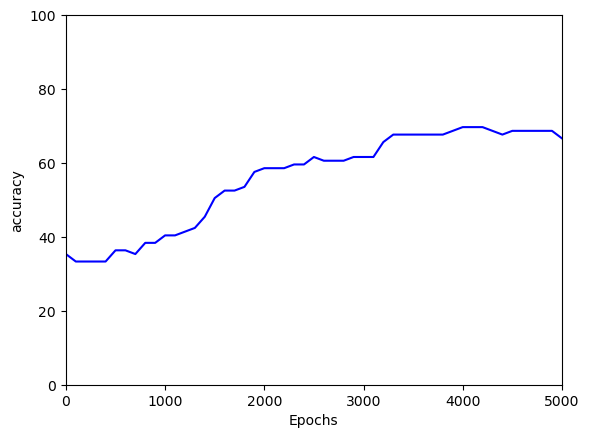

In [15]:
plt.plot(np.linspace(0, training_iterations, len(accuracies)), accuracies, 'b', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.axis([0, training_iterations, 0, 100 ])

(0.0, 5000.0, 0.0, 0.5)

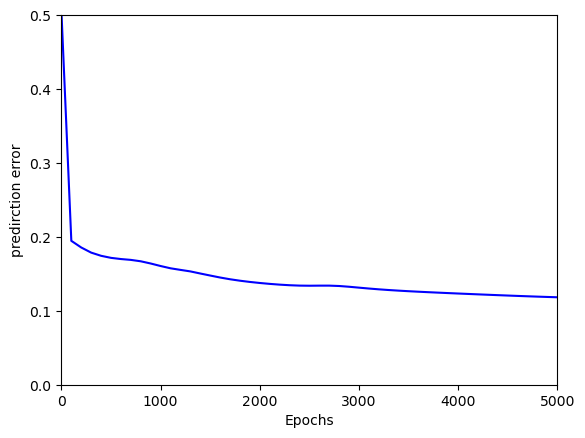

In [16]:
plt.plot(np.linspace(0, training_iterations, len(errors)), errors, 'b', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('predirction error')
plt.axis([0, training_iterations, 0, 0.5 ])

# Mini Batch network with default data
- values (it, lr, hu,...) below

learns faster, similar accuracy, lower learning rate

In [38]:
training_iterations = 2000
error_output_every = 50
learn_rate = 1
hidden_units = 8
np.random.seed(5)
batch_size = 100

dataSet = CreditDataset()
network = CreditNetwork_miniBatches(dataSet.get_train_x().shape[1], dataSet.get_train_y().shape[1], hidden_units, batch_size)

network.train(dataSet, training_iterations, learn_rate, error_output_every)
#print('final prediction: \n', network.predict(dataSet.get_test_x()))
accuracies = network.get_test_accuracies()
errors = network.get_train_errors()
print('overall accuracy = ', accuracies[len(network.get_test_accuracies())-1])

Setup Credit Network
Start training of the Credit network with mini-Batches...
Epoch 0 with error: 0.2053853946829541 and accuracy: 0.3333333333333333
Epoch 50 with error: 0.24204573458904355 and accuracy: 0.3333333333333333
Epoch 100 with error: 0.16656411530901838 and accuracy: 0.3333333333333333
Epoch 150 with error: 0.16331230320347498 and accuracy: 0.3434343434343434
Epoch 200 with error: 0.1633452245669234 and accuracy: 0.3838383838383838
Epoch 250 with error: 0.1603970639864236 and accuracy: 0.45454545454545453
Epoch 300 with error: 0.1334850497865045 and accuracy: 0.494949494949495
Epoch 350 with error: 0.1140066416134285 and accuracy: 0.5151515151515151
Epoch 400 with error: 0.12845542866336193 and accuracy: 0.5353535353535354
Epoch 450 with error: 0.2084556367963863 and accuracy: 0.5454545454545454
Epoch 500 with error: 0.15653545453648518 and accuracy: 0.5454545454545454
Epoch 550 with error: 0.13469614109522213 and accuracy: 0.5656565656565656
Epoch 600 with error: 0.144353

overall accuracy =  65.65656565656566


(0.0, 2000.0, 0.0, 100.0)

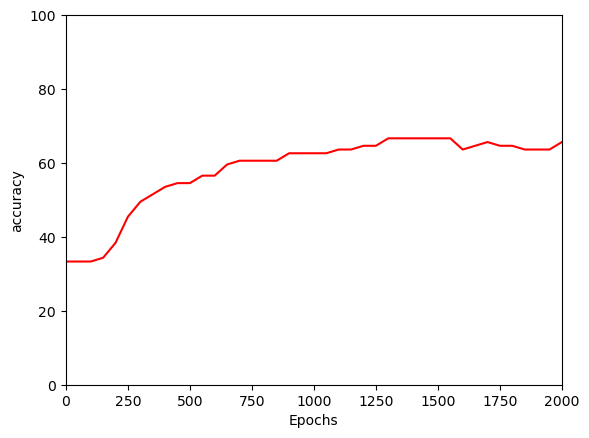

In [39]:
print('overall accuracy = ', accuracies[len(network.get_test_accuracies()) - 1])
plt.plot(np.linspace(0, training_iterations, len(accuracies)), accuracies, 'r', label='credit data')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.axis([0, training_iterations, 0, 100])

(0.0, 2000.0, 0.0, 0.5)

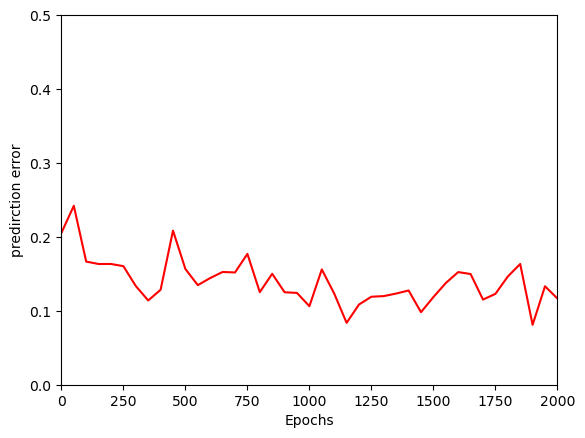

In [40]:
plt.plot(np.linspace(0, training_iterations, len(errors)), errors, 'r', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('predirction error')
plt.axis([0, training_iterations, 0, 0.5 ])

# Full Batch network with Undersampled data
- values (it, lr, hu,...) below

learns relatively fast, accuracy slightly higher , lower learning rate

In [86]:
training_iterations = 2800
error_output_every = 100
learn_rate = 0.8
hidden_units = 5
np.random.seed(5)
batch_size = 100

dataSet = CreditDatasetUndersampled()
network = CreditNetwork(dataSet.get_train_x().shape[1], dataSet.get_train_y().shape[1], hidden_units)

network.train(dataSet, training_iterations, learn_rate, error_output_every)
#print('final prediction: \n', network.predict(dataSet.get_test_x()))
accuracies = network.get_test_accuracies()
errors = network.get_train_errors()
print('overall accuracy = ', accuracies[len(network.get_test_accuracies())-1])

Setup Credit Network
Start training of the Credit network ...
Epoch 0 with error: 0.4982408498833479 and accuracy: 0.3333333333333333
Epoch 100 with error: 0.3266317630832695 and accuracy: 0.43434343434343436
Epoch 200 with error: 0.3060417327245946 and accuracy: 0.5252525252525253
Epoch 300 with error: 0.28649517475411546 and accuracy: 0.6060606060606061
Epoch 400 with error: 0.27224158394788917 and accuracy: 0.6060606060606061
Epoch 500 with error: 0.26407918735896685 and accuracy: 0.5959595959595959
Epoch 600 with error: 0.2622800761901165 and accuracy: 0.6060606060606061
Epoch 700 with error: 0.2599252275887607 and accuracy: 0.6161616161616161
Epoch 800 with error: 0.2509272971814256 and accuracy: 0.6363636363636364
Epoch 900 with error: 0.24261995686392163 and accuracy: 0.6464646464646465
Epoch 1000 with error: 0.23551500277817464 and accuracy: 0.6464646464646465
Epoch 1100 with error: 0.22909884201804973 and accuracy: 0.6464646464646465
Epoch 1200 with error: 0.22311303378544683 

overall accuracy =  69.6969696969697


(0.0, 2800.0, 0.0, 100.0)

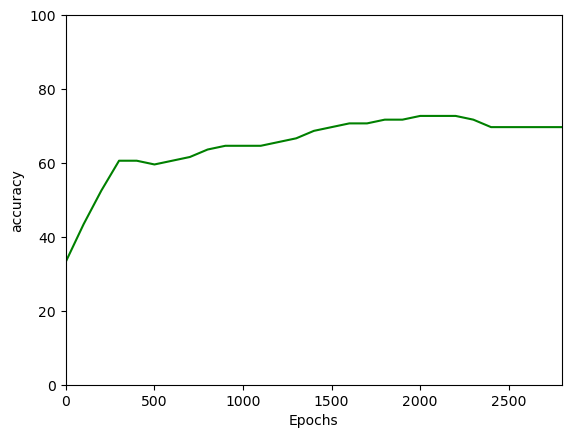

In [87]:
print('overall accuracy = ', accuracies[len(network.get_test_accuracies()) - 1])
plt.plot(np.linspace(0, training_iterations, len(accuracies)), accuracies, 'g', label='credit data')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.axis([0, training_iterations, 0, 100])

(0.0, 2800.0, 0.0, 0.5)

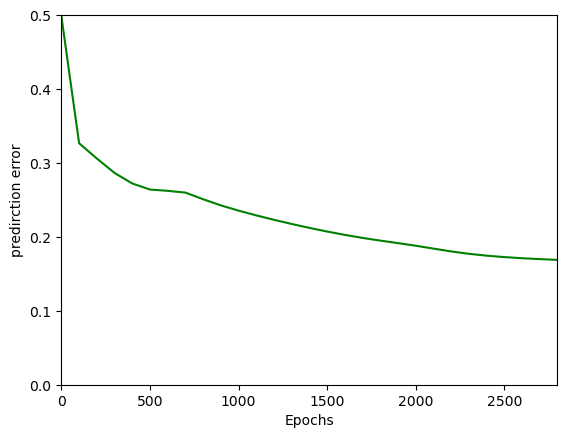

In [88]:
plt.plot(np.linspace(0, training_iterations, len(errors)), errors, 'g', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('predirction error')
plt.axis([0, training_iterations, 0, 0.5 ])

# Mini Batch network with Undersampled data
- values (it, lr, hu,...) below

learns fast, accuracy slightly higher , lower learning rate

In [89]:
training_iterations = 3000
error_output_every = 100
learn_rate = .3
hidden_units = 5
np.random.seed(5)
batch_size = 100

dataSet = CreditDatasetUndersampled()
network = CreditNetwork_miniBatches(dataSet.get_train_x().shape[1], dataSet.get_train_y().shape[1], hidden_units, batch_size)

network.train(dataSet, training_iterations, learn_rate, error_output_every)
#print('final prediction: \n', network.predict(dataSet.get_test_x()))
accuracies = network.get_test_accuracies()
errors = network.get_train_errors()
print('overall accuracy = ', accuracies[len(network.get_test_accuracies())-1])

Setup Credit Network
Start training of the Credit network with mini-Batches...
Epoch 0 with error: 0.48911874887388557 and accuracy: 0.3333333333333333
Epoch 100 with error: 0.3282144504962332 and accuracy: 0.36363636363636365
Epoch 200 with error: 0.3213035361893517 and accuracy: 0.48484848484848486
Epoch 300 with error: 0.3022695044406495 and accuracy: 0.5353535353535354
Epoch 400 with error: 0.2911654255626058 and accuracy: 0.6060606060606061
Epoch 500 with error: 0.2845959276516832 and accuracy: 0.6060606060606061
Epoch 600 with error: 0.2736849668925605 and accuracy: 0.5858585858585859
Epoch 700 with error: 0.2545583618354081 and accuracy: 0.5858585858585859
Epoch 800 with error: 0.2693564826412931 and accuracy: 0.6060606060606061
Epoch 900 with error: 0.2610875769015626 and accuracy: 0.6161616161616161
Epoch 1000 with error: 0.24573662965296314 and accuracy: 0.6464646464646465
Epoch 1100 with error: 0.25822797803737535 and accuracy: 0.6363636363636364
Epoch 1200 with error: 0.252

overall accuracy =  70.70707070707071


(0.0, 5000.0, 0.0, 100.0)

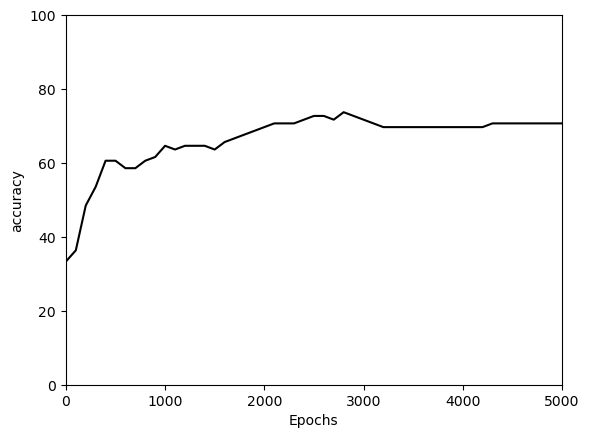

In [81]:
print('overall accuracy = ', accuracies[len(network.get_test_accuracies()) - 1])
plt.plot(np.linspace(0, training_iterations, len(accuracies)), accuracies, 'k', label='credit data')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.axis([0, training_iterations, 0, 100])

(0.0, 5000.0, 0.0, 0.5)

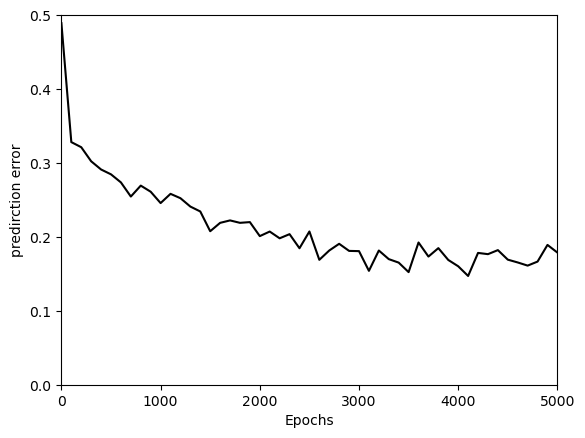

In [82]:
plt.plot(np.linspace(0, training_iterations, len(errors)), errors, 'k', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('predirction error')
plt.axis([0, training_iterations, 0, 0.5 ])

# Full Batch network with Oversampled data
- values (it, lr, hu,...) below

learns fast, accuracy slightly higher , multiple learning rates work well, more units work well

In [116]:
training_iterations = 2000
error_output_every = 100
learn_rate = 5
hidden_units = 12
np.random.seed(5)
batch_size = 100

dataSet = CreditDatasetOversampled()
network = CreditNetwork(dataSet.get_train_x().shape[1], dataSet.get_train_y().shape[1], hidden_units)

network.train(dataSet, training_iterations, learn_rate, error_output_every)
#print('final prediction: \n', network.predict(dataSet.get_test_x()))
accuracies = network.get_test_accuracies()
errors = network.get_train_errors()
print('overall accuracy = ', accuracies[len(network.get_test_accuracies())-1])

Setup Credit Network
Start training of the Credit network ...
Epoch 0 with error: 0.3839957187364883 and accuracy: 0.31313131313131315
Epoch 100 with error: 0.2189455107522919 and accuracy: 0.6767676767676768
Epoch 200 with error: 0.18961102778115832 and accuracy: 0.7373737373737373
Epoch 300 with error: 0.18066459801418439 and accuracy: 0.7272727272727273
Epoch 400 with error: 0.1745593707009699 and accuracy: 0.6868686868686869
Epoch 500 with error: 0.16981868218798474 and accuracy: 0.7171717171717171
Epoch 600 with error: 0.1658731045349594 and accuracy: 0.7272727272727273
Epoch 700 with error: 0.16276511082139844 and accuracy: 0.7474747474747475
Epoch 800 with error: 0.16054565520615205 and accuracy: 0.7474747474747475
Epoch 900 with error: 0.15985059588660291 and accuracy: 0.7474747474747475
Epoch 1000 with error: 0.16138649204167166 and accuracy: 0.7373737373737373
Epoch 1100 with error: 0.16118179139920813 and accuracy: 0.7373737373737373
Epoch 1200 with error: 0.1580479594385614

overall accuracy =  73.73737373737373


(0.0, 2000.0, 0.0, 100.0)

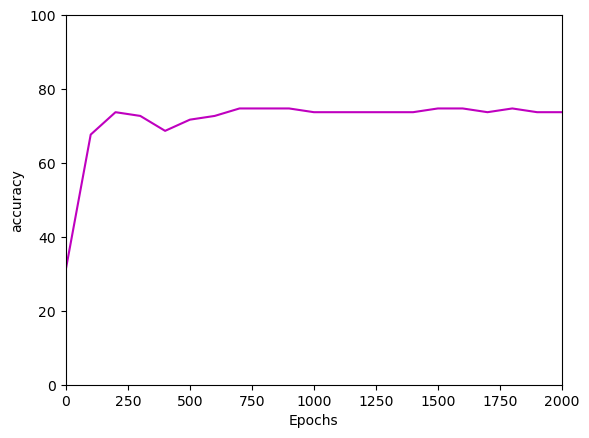

In [117]:
print('overall accuracy = ', accuracies[len(network.get_test_accuracies()) - 1])
plt.plot(np.linspace(0, training_iterations, len(accuracies)), accuracies, 'm', label='credit data')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.axis([0, training_iterations, 0, 100])

(0.0, 2000.0, 0.0, 0.5)

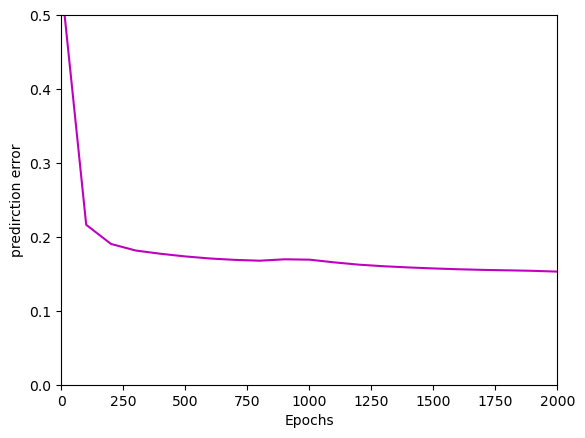

In [113]:
plt.plot(np.linspace(0, training_iterations, len(errors)), errors, 'm', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('predirction error')
plt.axis([0, training_iterations, 0, 0.5 ])

# Mini Batch network with Oversampled data
- values (it, lr, hu,...) below

learns fast, accuracy slightly higher , lower learning rate, more hidden units

In [142]:
training_iterations = 2000
error_output_every = 100
learn_rate = .4
hidden_units = 10
np.random.seed(5)
batch_size = 100

dataSet = CreditDatasetOversampled()
network = CreditNetwork_miniBatches(dataSet.get_train_x().shape[1], dataSet.get_train_y().shape[1], hidden_units, batch_size)

network.train(dataSet, training_iterations, learn_rate, error_output_every)
#print('final prediction: \n', network.predict(dataSet.get_test_x()))
accuracies = network.get_test_accuracies()
errors = network.get_train_errors()
print('overall accuracy = ', accuracies[len(network.get_test_accuracies())-1])

Setup Credit Network
Start training of the Credit network with mini-Batches...
Epoch 0 with error: 0.37935134985402946 and accuracy: 0.3434343434343434
Epoch 100 with error: 0.2098787773621372 and accuracy: 0.7070707070707071
Epoch 200 with error: 0.1874296961897778 and accuracy: 0.7272727272727273
Epoch 300 with error: 0.20757471482691603 and accuracy: 0.7272727272727273
Epoch 400 with error: 0.15742032174974013 and accuracy: 0.7171717171717171
Epoch 500 with error: 0.15216657147608484 and accuracy: 0.7474747474747475
Epoch 600 with error: 0.1524325236360278 and accuracy: 0.7474747474747475
Epoch 700 with error: 0.18192383921181945 and accuracy: 0.7373737373737373
Epoch 800 with error: 0.1716785820266454 and accuracy: 0.7474747474747475
Epoch 900 with error: 0.14644270806340218 and accuracy: 0.7474747474747475
Epoch 1000 with error: 0.15114192208693333 and accuracy: 0.7575757575757576
Epoch 1100 with error: 0.13530156267510698 and accuracy: 0.7373737373737373
Epoch 1200 with error: 0.

overall accuracy =  71.71717171717171


(0.0, 2000.0, 0.0, 100.0)

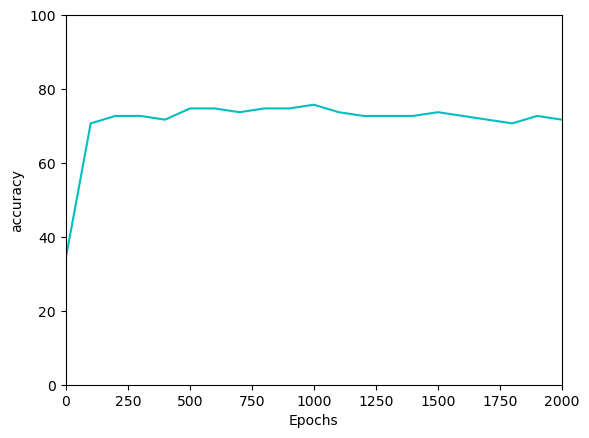

In [143]:
print('overall accuracy = ', accuracies[len(network.get_test_accuracies()) - 1])
plt.plot(np.linspace(0, training_iterations, len(accuracies)), accuracies, 'c', label='credit data')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.axis([0, training_iterations, 0, 100])

(0.0, 2000.0, 0.0, 0.5)

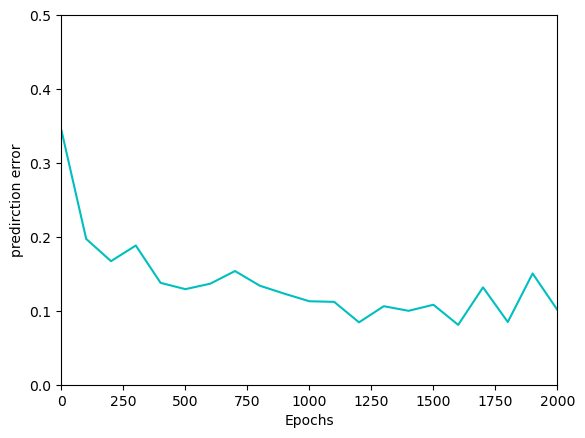

In [141]:
plt.plot(np.linspace(0, training_iterations, len(errors)), errors, 'c', label ='credit data')
plt.xlabel('Epochs')
plt.ylabel('predirction error')
plt.axis([0, training_iterations, 0, 0.5 ])

oversampled data -> more hidden units?
mini batches -> lower learning rate?
(not in general but for this problem)